# Goal of this notebook

This notebook is partly a tutorial on the Precision-Recall method to evaluate your model.

This notebook will also explore this method using a real example of a logistic regression model.  

# Precision - Recall evaluators

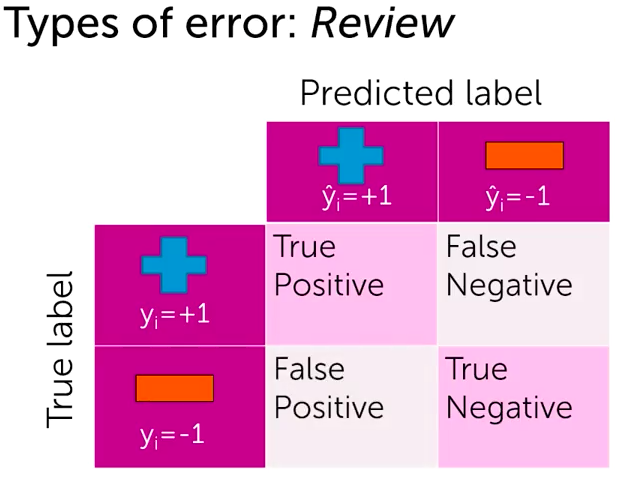

In [1]:
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/error-types-1.png')

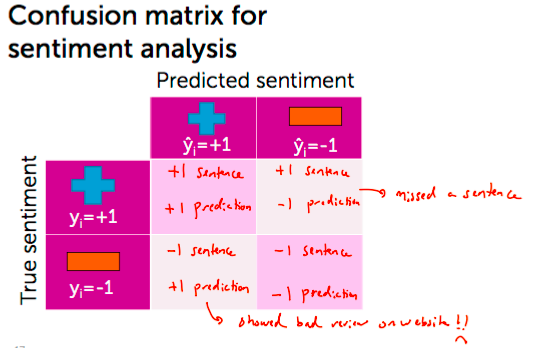

In [2]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/error-types-2.png')

**Precision = Fraction of positive predictions that are actually positive**

    ' What fraction of the positive predictions are correct?'
    Worry is whether we also included negative predictions.
    
    High precision means positive predictions actually likely to be positive.

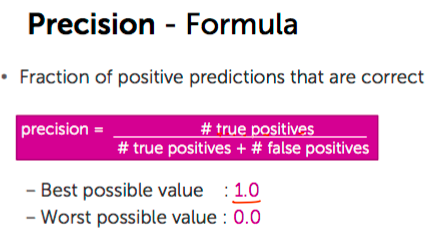

In [3]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/precision-formula.png')

**Recall = Fraction of positive data predicted to be positive**

    'What fraction of positive sentences was missed out?
    
    High recall means positive data points are very likely to be discovered.

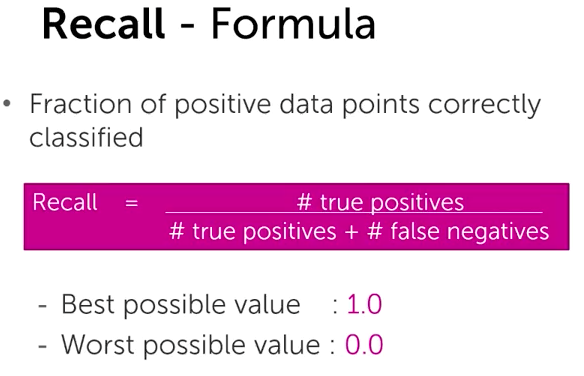

In [5]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/recall-formula.png')

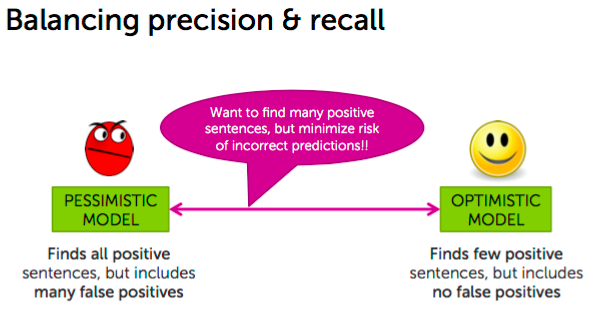

In [6]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/optimistic-pessimistic-model.png')

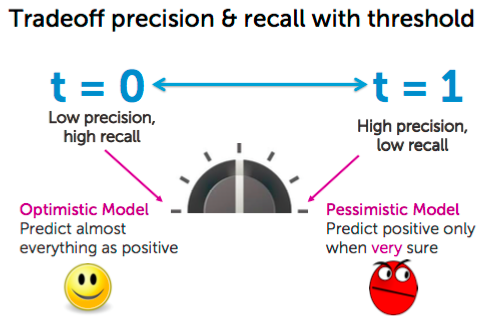

In [8]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/tradeoff-precision-recall.png')

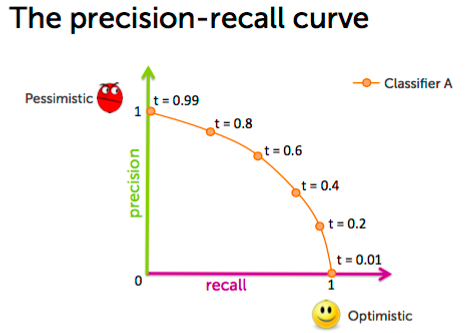

In [9]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/precision-recall-curve.png')

    t represents the threshold

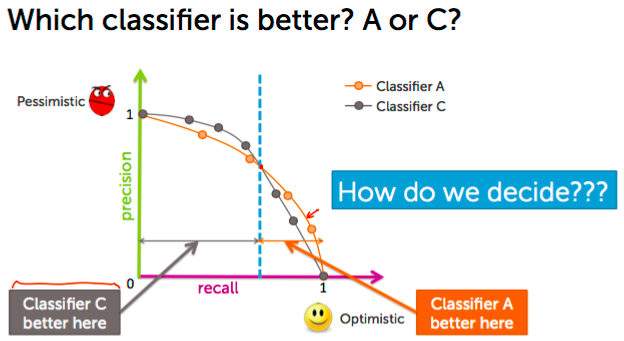

In [10]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/choosing-classifier.png')

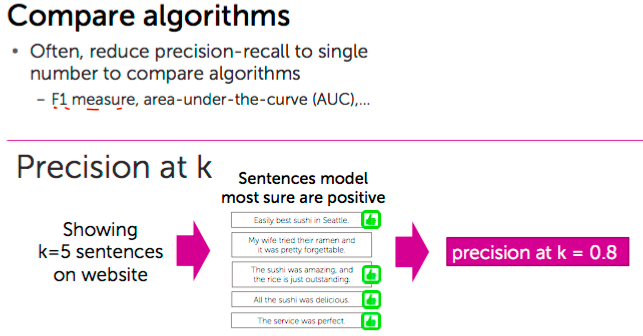

In [11]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/precision-at-k.png')

    Precision at k is a good algorithm to choose the threshold.

# Exploring precision and recall

In [12]:
import graphlab
from __future__ import division
import numpy as np
graphlab.canvas.set_target('ipynb')

In [13]:
# sframe
products = graphlab.SFrame('/Users/annalie/Dev/data-science-from-scratch/data/amazon_baby.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1482444586.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1482444586.log


This non-commercial license of GraphLab Create for academic use is assigned to annaliakruseman@gmail.com and will expire on August 25, 2017.


In [16]:
products.column_names()

['name', 'review', 'rating']

In [17]:
# extract word counts and sentiments

def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 

# Remove punctuation.
review_clean = products['review'].apply(remove_punctuation)

# Count words
products['word_count'] = graphlab.text_analytics.count_words(review_clean)

# Drop neutral sentiment reviews.
products = products[products['rating'] != 3]

# Positive sentiment to +1 and negative sentiment to -1
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [18]:
products.head(5)

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 3, 'highly': 1, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'and': 3, 'ingenious':1, 'love': 2, 'what': 1, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'all': 2,'help': 1, 'cried': 1, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ...",1


In [19]:
# split data into training and test set

train_data, test_data = products.random_split(.8, seed=1)

In [20]:
# train a logistic regression classifier

model = graphlab.logistic_classifier.create(train_data, target='sentiment',
                                            features=['word_count'],
                                            validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133416

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 121712

Number of coefficients    : 121713

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 1         | 5        | 0.000002  | 3.143458     | 0.840754          |

| 2         | 9        | 3.000000  | 4.801862     | 0.931350          |

| 3         | 10       | 3.000000  | 5.397512     | 0.882046          |

| 4         | 11       | 3.000000  | 5.988891     | 0.954076          |

| 5         | 12       | 3.000000  | 6.597936     | 0.960964          |

| 6         | 13       | 3.000000  | 7.199695     | 0.975033          |

+-----------+----------+-----------+--------------+-------------------+

TERMINATED: Terminated due to numerical difficulties.

This model may not be ideal. To improve it, consider doing one of the following:
(a) Increasing the regularization.
(b) Standardizing the input data.
(c) Removing highly correlated features.
(d) Removing `inf` and `NaN` values in the training data.

# Model evaluation

## Accuracy

In [21]:
accuracy= model.evaluate(test_data, metric='accuracy')['accuracy']
print "Test Accuracy: %s" % accuracy

Test Accuracy: 0.914536837053


## Baseline: Majority class prediction

The majority classifier model predicts the majority class for all data points. 

Typically, a good model should beat the majority class classifier. 
Since the majority class in this dataset is the positive class (more positive than negative reviews), 
the accuracy of the majority class classifier can be computed as follows:

In [22]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print "Baseline accuracy (majority class classifier): %s" % baseline

Baseline accuracy (majority class classifier): 0.842782577394


## Confusion Matrix

```
              +---------------------------------------------+
              |                Predicted label              |
              +----------------------+----------------------+
              |          (+1)        |         (-1)         |
+-------+-----+----------------------+----------------------+
| True  |(+1) | # of true positives  | # of false negatives |
| label +-----+----------------------+----------------------+
|       |(-1) | # of false positives | # of true negatives  |
+-------+-----+----------------------+----------------------+
```
To print out the confusion matrix for a classifier, use `metric='confusion_matrix'`:

In [23]:
confusion_matrix = model.evaluate(test_data, metric='confusion_matrix')['confusion_matrix']
confusion_matrix

target_label,predicted_label,count
1,-1,1406
-1,-1,3798
-1,1,1443
1,1,26689


    1443 false positives
    1406 false negatives

## Precision and Recall

Goal is to reduce the percentage of false positives to be less than, say, 3.5% of all positive predictions. 
This is where **precision** comes in:

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

So to keep the percentage of false positives below 3.5% of positive predictions, we must raise the precision to 96.5% or higher. 

In [24]:
# compute the precision of the logistic regression classifier on the test data set
precision = model.evaluate(test_data, metric='precision')['precision']
print "Precision on test data: %s" % precision

Precision on test data: 0.948706099815


In [26]:
false_negative = confusion_matrix[0]["count"]
true_negatives = confusion_matrix[1]["count"]
false_positives = confusion_matrix[2]["count"]
true_positives = confusion_matrix[3]["count"]

In [29]:
predicted_positives = true_positives + false_positives
round(false_positives/predicted_positives, 2)

0.05

A complementary metric is **recall**, which measures the ratio between the number of true positives and that of (ground-truth) positive reviews:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

In [30]:
# compute the recall on the test data

recall = model.evaluate(test_data, metric='recall')['recall']
print "Recall on test data: %s" % recall

Recall on test data: 0.949955508098


In [32]:
# show the fraction of the positive reviews in the test_set that 
# were correctly predicted as positive by the classifier

actual_positives = false_negative + true_positives
round(true_positives/actual_positives, 2)

0.95

# Precision-recall tradeoff

In [33]:
def apply_threshold(probabilities, threshold):
    # +1 if >= threshold and -1 otherwise.
    return graphlab.SArray([+1 if p >= threshold else -1 for p in probabilities])

    Run prediction with `output_type='probability'` to get the list of probability values. 
    Then use thresholds set at 0.5 (default) and 0.9 to make predictions from these probability values.

In [34]:
probabilities = model.predict(test_data, output_type='probability')
predictions_with_default_threshold = apply_threshold(probabilities, 0.5)
predictions_with_high_threshold = apply_threshold(probabilities, 0.9)

In [35]:
print "Number of positive predicted reviews (threshold = 0.5): %s" % (predictions_with_default_threshold == 1).sum()

Number of positive predicted reviews (threshold = 0.5): 28132


In [36]:
print "Number of positive predicted reviews (threshold = 0.9): %s" % (predictions_with_high_threshold == 1).sum()

Number of positive predicted reviews (threshold = 0.9): 25630


    When the threshold increases, we create a more pessimistic model with 
    a lower number of positive predicted reviews

## Exploring the associated precision and recall as the threshold varies

By changing the probability threshold, it is possible to influence precision and recall.

In [39]:
# Threshold = 0.5
precision_with_default_threshold = graphlab.evaluation.precision(test_data['sentiment'],
                                                        predictions_with_default_threshold)
recall_with_default_threshold = graphlab.evaluation.recall(test_data['sentiment'],
                                                        predictions_with_default_threshold)

# Threshold = 0.9
precision_with_high_threshold = graphlab.evaluation.precision(test_data['sentiment'],
                                                        predictions_with_high_threshold)
recall_with_high_threshold = graphlab.evaluation.recall(test_data['sentiment'],
                                                        predictions_with_high_threshold)

In [41]:
print "Precision (threshold = 0.5): %s" % precision_with_default_threshold
print "Recall (threshold = 0.5)   : %s" % recall_with_default_threshold

Precision (threshold = 0.5): 0.948706099815
Recall (threshold = 0.5)   : 0.949955508098


In [42]:
print "Precision (threshold = 0.9): %s" % precision_with_high_threshold
print "Recall (threshold = 0.9)   : %s" % recall_with_high_threshold

Precision (threshold = 0.9): 0.969527896996
Recall (threshold = 0.9)   : 0.884463427656


    When threshold increases:
    - precision increases
    - recall decreases

## Precision-recall curve

Compare different values of thresholds, compute the precision and recall scores, and then plot the precision-recall curve.

In [45]:
# create different values of thresholds
threshold_values = np.linspace(0.5, 1, num=100)
print threshold_values

[ 0.5         0.50505051  0.51010101  0.51515152  0.52020202  0.52525253
  0.53030303  0.53535354  0.54040404  0.54545455  0.55050505  0.55555556
  0.56060606  0.56565657  0.57070707  0.57575758  0.58080808  0.58585859
  0.59090909  0.5959596   0.6010101   0.60606061  0.61111111  0.61616162
  0.62121212  0.62626263  0.63131313  0.63636364  0.64141414  0.64646465
  0.65151515  0.65656566  0.66161616  0.66666667  0.67171717  0.67676768
  0.68181818  0.68686869  0.69191919  0.6969697   0.7020202   0.70707071
  0.71212121  0.71717172  0.72222222  0.72727273  0.73232323  0.73737374
  0.74242424  0.74747475  0.75252525  0.75757576  0.76262626  0.76767677
  0.77272727  0.77777778  0.78282828  0.78787879  0.79292929  0.7979798
  0.8030303   0.80808081  0.81313131  0.81818182  0.82323232  0.82828283
  0.83333333  0.83838384  0.84343434  0.84848485  0.85353535  0.85858586
  0.86363636  0.86868687  0.87373737  0.87878788  0.88383838  0.88888889
  0.89393939  0.8989899   0.9040404   0.90909091  0.

In [46]:
# compute the precision and recall scores for each of the values of thresholds

precision_all = []
recall_all = []

probabilities = model.predict(test_data, output_type='probability')
for threshold in threshold_values:
    predictions = apply_threshold(probabilities, threshold)
    
    precision = graphlab.evaluation.precision(test_data['sentiment'], predictions)
    recall = graphlab.evaluation.recall(test_data['sentiment'], predictions)
    
    precision_all.append(precision)
    recall_all.append(recall)

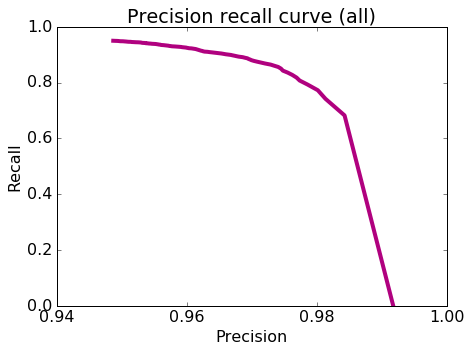

In [47]:
# plot the precision-recall curve to visualize the precision-recall tradeoff as we vary the threshold

import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

In [48]:
# show the smallest threshold value that achieves a precision of 96.5% or better?
i = [i for i, p in enumerate(precision_all) if p >= .965][0]
round(threshold_values[i], 3)

0.838

In [52]:
# with a threshold of 0.98, show the number of false negatives on the test_data

# false_negative = confusion_matrix[0]["count"]
targets = test_data['sentiment']
probabilities = model.predict(test_data, output_type='probability')
predictions_with_threshold_098 = apply_threshold(probabilities, 0.98)
graphlab.evaluation.confusion_matrix(targets,predictions_with_threshold_098)[2] # false negatives is 3rd row

{'count': 5826, 'predicted_label': -1, 'target_label': 1}

# Evaluating specific search terms

## Precision-Recall on all baby related items

In [53]:
# select all the reviews for all products with the word 'baby' in them
baby_reviews = test_data[test_data['name'].apply(lambda x: 'baby' in x.lower())]

In [54]:
# predict the probability of classifying these reviews as positive

probabilities = model.predict(baby_reviews, output_type='probability')

In [55]:
# plot the precision-recall curve for the baby_reviews dataset

# 1. choose threshold values in the range from 0.5 to 1 
threshold_values = np.linspace(0.5, 1, num=100)

# 2. compute precision and recall for each value in threshold_values on the baby_reviews dataset
precision_all = []
recall_all = []

for threshold in threshold_values:
    
    # Make predictions. Use the `apply_threshold` function 
    predictions = apply_threshold(probabilities, threshold)

    # Calculate the precision and recall
    precision = graphlab.evaluation.precision(baby_reviews['sentiment'], predictions)
    recall = graphlab.evaluation.recall(baby_reviews['sentiment'], predictions) 
    
    # Append the precision and recall scores.
    precision_all.append(precision)
    recall_all.append(recall)

In [56]:
# show the smallest threshold value that achieves a precision of 96.5% or better 
# for the reviews in the baby_reviews dataset
i = [i for i, p in enumerate(precision_all) if p >= .965][0]
round(threshold_values[i], 3)

0.864

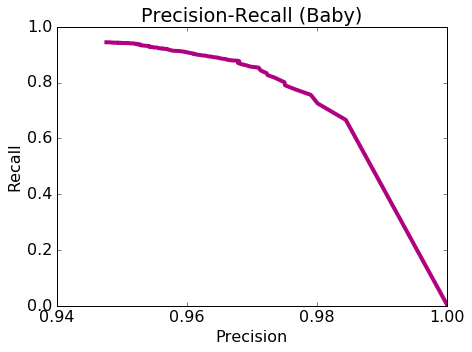

In [57]:
# plot the Precision - Recall curve
plot_pr_curve(precision_all, recall_all, "Precision-Recall (Baby)")